## Problem and dataset description
Pricing a rental property such as an apartment or house on Airbnb is a difficult challenge. A model that accurately predicts the price can potentially help renters and hosts on the platform make better decisions. In this assignment, your task is to train a model that takes features of a listing as input and predicts the price.

We have provided you with a dataset collected from the Airbnb website for New York, which has a total of 29,985 entries, each with 764 features. You may use the provided data as you wish in development. We will train your submitted code on the same provided dataset, and will evaluate it on 2 other test sets (one public, and one hidden during the challenge).

We have already done some minimal data cleaning for you, such as converting text fields into categorical values and getting rid of the NaN values. To convert text fields into categorical values, we used different strategies depending on the field. For example, sentiment analysis was applied to convert user reviews to numerical values ('comments' column). We added different columns for state names, '1' indicating the location of the property. Column names are included in the data files and are mostly descriptive.

Also in this data cleaning step, the price value that we are trying to predict is calculated by taking the log of original price. Hence, the minimum value for our output price is around 2.302 and maximum value is around 9.21 on the training set.


## Datasets and Codebase

Please download the zip file from the link posted on Piazza/Resources.
In this notebook, we implemented a linear regression model with random weights (**attached in the end**). For datasets, there’re 2 CSV files for features and labels:

    challenge.ipynb (This file: you need to add your code in here, convert it to .py to submit)
    data_cleaned_train_comments_X.csv
    data_cleaned_train_y.csv


## Evaluation

We will evaluate your model as follows

    model = Model() # Model class imported from your submission
    X_train = pd.read_csv("data_cleaned_train_comments_X.csv")  # pandas Dataframe
    y_train = pd.read_csv("data_cleaned_train_y.csv")  # pandas Dataframe
    model.train(X_train, y_train) # train your model on the dataset provided to you
    y_pred = model.predict(X_test) # test your model on the hidden test set (pandas Dataframe)
    mse = mean_squared_error(y_test, y_pred) # compute mean squared error


**There will be 2 test sets, one is public which means you can see MSE on this test set on the Leaderboard (denoted as *MSE (PUBLIC TESTSET)*), and the other one is hidden during the challenge (denoted as *MSE (HIDDEN TESTSET)*)**.
Your score on the hidden test set will be your performance measure. So, don’t try to overfit your model on the public test set. Your final grade will depend on the following criteria:


1.  	Is it original code (implemented by you)?
2.  	Does it take a reasonable time to complete?
    Your model needs to finish running in under 40 minutes on our machine. We run the code on a machine with 4 CPUs, 6.0GB RAM.
3.  	Does it achieve a reasonable MSE?
    - **Initial submission (10 pts)**: Your model has to be better than the random weights linear model (denoted as RANDOM BASELINE on Leaderboard) provided in the file. Note this will due on **Nov 26, 11:59pm**.
    - **Final submission (90 pts):** Your last submission will count as the final submission. There are four MSE checkpoints and you will be graded accordingly.
        - Random Chance MSE ~40 and above: Grade=0
        - MSE 0.5: Grade = 30
        - MSE 0.157: Grade = 60 (denoated as 60 POINT SCORE BASELINE on the Leaderboard)
        - MSE 0.143: Grade = 76.5
        - MSE 0.1358 and below: Grade = 90 (denoated as FULL CREDIT PERFORMANCE on the Leaderboard)
    
    The grade will be linearly interpolated for the submissions that lie in between the checkpoints above. We will use MSE on the hidden test set to evaluate your model (lower is better).

    **Bonus**: **Top 3** with the best MSE on the hidden test set will get a 5 point bonus.

In this challenge, you can only use built-in python modules, and these following:
- Numpy
- pandas
- scikit_learn
- matplotlib
- scipy
- torchsummary
- xgboost
- torchmetrics
- lightgbm
- catboost
- torch



In [ ]:
!pip install "ray[tune]"
!pip install optuna
!pip instlal deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 MB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.9/78.9 kB 9.2 MB/s eta 0:00:00


In [ ]:
from typing import Tuple
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
import ray
from ray import train, tune
import xgboost as xgb
from xgboost import train as xgb_train, DMatrix
import optuna

In [ ]:
class Model(LinearRegression):

  def __init__(self, fit_intercept=True, copy_X=True, n_jobs=None, positive=False):
    super().__init__(fit_intercept=fit_intercept, copy_X=copy_X, n_jobs=n_jobs, positive=positive)

  def train(self, X, y, sample_weight=None):
    return super().fit(X, y, sample_weight=sample_weight)

  def predict(self, X):
    predictions = super().predict(X)
    return predictions

  def score(self, X, y, sample_weight=None):
    return super().score(X, y, sample_weight=sample_weight)

class Model(Ridge):

  def __init__(self, alpha=1.0, fit_intercept=True, copy_X=True, max_iter=None, tol=0.001, solver='auto'):
    super().__init__(alpha=alpha, fit_intercept=fit_intercept , copy_X=copy_X, max_iter=max_iter, tol=tol, solver=solver)

  def train(self, X_train: pd.DataFrame, y_train: pd.DataFrame) -> None:
    return super().fit(X_train, y_train)

  def predict(self, X_test: pd.DataFrame) -> np.array:
    predictions = super().predict(X_test)
    return predictions

  def score(self, X, y, sample_weight=None):
    return super().score(X, y, sample_weight=sample_weight)

class Model(Ridge):

  def __init__(self, alpha=1.0, fit_intercept=True, copy_X=True, max_iter=None, tol=0.001, solver='auto'):
    super().__init__(alpha=alpha, fit_intercept=fit_intercept , copy_X=copy_X, max_iter=max_iter, tol=tol, solver=solver)

  def train(self, X_train: pd.DataFrame, y_train: pd.DataFrame) -> None:
    return super().fit(X_train, y_train)

  def predict(self, X_test: pd.DataFrame) -> np.array:
    predictions = super().predict(X_test)
    return predictions

  def score(self, X, y, sample_weight=None):
    return super().score(X, y, sample_weight=sample_weight)

class BestXGBoostModel:

    def __init__(self):

        self.model = None


    def train(self, X_train: pd.DataFrame, y_train: pd.DataFrame) -> None:
        """
        Train model with training data.
        Currently, we use a linear regression with random weights
        You need to modify this function.
        :param X_train: shape (N,d)
        :param y_train: shape (N,1)
            where N is the number of observations, d is feature dimension
        :return: None
        """

        train_dmatrix = DMatrix(X_train, label=y_train)

        config = {
            'eta': 0.08496594470238338,
            'max_depth': 9,
            'min_child_weight': 8.9675096715715,
            'gamma': 0.5049925962349848,
            'subsample': 0.6290505901444937,
            'colsample_bytree': 0.9648687852338899,
            'colsample_bynode': 0.9736308190079206,
            'lambda': 0.9445664225573618,
            'alpha': 1.2411699187203415,
            'scale_pos_weight': 0.5649221875527276,
            'max_delta_step': 2.690017033531642,
            'tree_method': 'hist',
            'device': 'cuda',
            'objective': 'reg:squarederror',
        }

        self.model = xgb_train(
            config,
            train_dmatrix,
            num_boost_round=200,
            verbose_eval=False
        )


        return None

    def predict(self, X_test: pd.DataFrame) -> np.array:
        """
        Use the trained model to predict on un-seen dataset
        You need to modify this function
        :param X_test: shape (N, d), where N is the number of observations, d is feature dimension
        return: prediction, shape (N,1)
        """

        if self.model is None:
          raise ValueError("Model is not trained. Please train model before using predict.")

        test_dmatrix = DMatrix(X_test)

        y_pred = self.model.predict(test_dmatrix)
        return y_pred

# This was the best model
class XGBoost_Genetic_Alg_1:

    def __init__(self):

        self.model = None


    def train(self, X_train: pd.DataFrame, y_train: pd.DataFrame) -> None:
        """
        Train model with training data.
        Currently, we use a linear regression with random weights
        You need to modify this function.
        :param X_train: shape (N,d)
        :param y_train: shape (N,1)
            where N is the number of observations, d is feature dimension
        :return: None
        """

        train_dmatrix = DMatrix(X_train, label=y_train)

        config = {
          'eta': 0.02440452995450439,
          'max_depth': 9,
          'min_child_weight': 8.842563655334349,
          'gamma': 0.4554410118118954,
          'subsample': 0.385364267249304,
          'colsample_bytree': 0.6278729338075488,
          'colsample_bynode': 0.5942330366425619,
          'lambda': 0.8242622078882365,
          'alpha': 3.4201797255333926,
          'scale_pos_weight': 0.5817562977856805,
          'max_delta_step': 6.177038449772018,
          'tree_method': 'hist',
          'device': 'cuda',
          'objective': 'reg:squarederror',
      }

        self.model = xgb_train(
            config,
            train_dmatrix,
            num_boost_round=1999,
            verbose_eval=False
        )


        return None

    def predict(self, X_test: pd.DataFrame) -> np.array:
        """
        Use the trained model to predict on un-seen dataset
        You need to modify this function
        :param X_test: shape (N, d), where N is the number of observations, d is feature dimension
        return: prediction, shape (N,1)
        """

        if self.model is None:
          raise ValueError("Model is not trained. Please train model before using predict.")

        test_dmatrix = DMatrix(X_test)

        y_pred = self.model.predict(test_dmatrix)
        return y_pred

class GA_2:
    # Modify your model, default is a linear regression model with random weights

    def __init__(self):

        self.model = None


    def train(self, X_train: pd.DataFrame, y_train: pd.DataFrame) -> None:
        """
        Train model with training data.
        Currently, we use a linear regression with random weights
        You need to modify this function.
        :param X_train: shape (N,d)
        :param y_train: shape (N,1)
            where N is the number of observations, d is feature dimension
        :return: None
        """

        train_dmatrix = DMatrix(X_train, label=y_train)

        config = {
          'eta': 0.012921673143296977,
          'max_depth': 12,
          'min_child_weight': 5.8862696319102135,
          'gamma': 0.02500726605801173,
          'subsample': 0.5681343930926404,
          'colsample_bytree': 0.7349140753784509,
          'colsample_bynode': 0.7499945228442386,
          'lambda': 0.7990087245236146,
          'alpha': 0.5583616230725668,
          'scale_pos_weight': 0.7453946335286963,
          'max_delta_step': 3.001428055860189,
          'tree_method': 'hist',
          'device': 'cuda',
          'objective': 'reg:squarederror',
      }

        self.model = xgb_train(
            config,
            train_dmatrix,
            num_boost_round=2222,
            verbose_eval=False
        )


        return None

    def predict(self, X_test: pd.DataFrame) -> np.array:
        """
        Use the trained model to predict on un-seen dataset
        You need to modify this function
        :param X_test: shape (N, d), where N is the number of observations, d is feature dimension
        return: prediction, shape (N,1)
        """

        if self.model is None:
          raise ValueError("Model is not trained. Please train model before using predict.")

        test_dmatrix = DMatrix(X_test)

        y_pred = self.model.predict(test_dmatrix)
        return y_pred







In [ ]:
X = pd.read_csv("data_cleaned_train_comments_X.csv")
y = pd.read_csv("data_cleaned_train_y.csv")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [ ]:
# Using Regularization
from sklearn.pipeline import Pipeline


def regularized_model(regularization, alpha_1, alpha_2, X_train, y_train, X_test, y_test):

  if regularization == "L1":
    model = Lasso(alpha_1)
  elif regularization == "L2":
    model = Ridge(alpha_2)
  else:
    print("Error: must be valid model")

  steps = [
      ('scalar', StandardScaler()),
      ('model', model)
  ]

  linear_pipe = Pipeline(steps)
  linear_pipe.fit(X_train, y_train)

  train_score = linear_pipe.score(X_train, y_train)
  test_score = linear_pipe.score(X_test, y_test)

  return [train_score, test_score]




In [ ]:
# Testing L1 vs. L2
alpha_1 = 0.10
alpha_2 = 1

for regularization in ["L1", "L2"]:
  train_score, test_score = regularized_model(regularization, alpha_1, alpha_2,
                                              X_train, y_train, X_test, y_test)
  print(f"regularization: {regularization}, train_score: {train_score}, test_score: {test_score}")

# Conclusion: L2 is better than L1



regularization: L1, train_score: 0.5157897281380033, test_score: 0.5164408367118302
regularization: L2, train_score: 0.6938790458692601, test_score: 0.6777539488552629


In [ ]:
# Finding best alpha
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
alphas = [0.1, 1, 10, 100, 1000]

grid = GridSearchCV(estimator=ridge, param_grid={'alpha': alphas}, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

best_alpha = grid.best_params_['alpha']
print(best_alpha)
# Conclusion: Best alpha value for ridge is 1


1


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

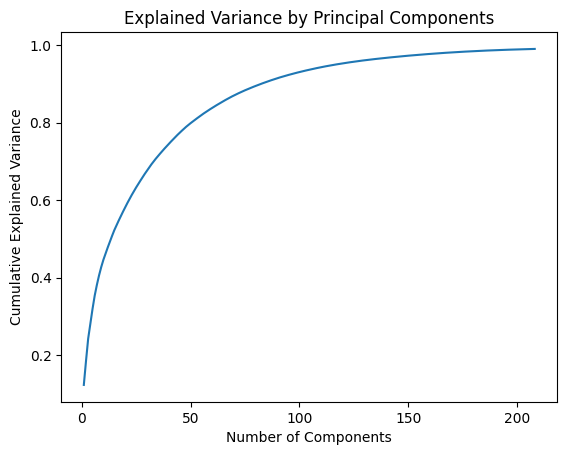

In [ ]:
# Using PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.99, svd_solver='full')
X_train_reduced = pca.fit_transform(X_scaled)
X_test_reduced = pca.fit_transform(X_test)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Principal Components")
plt.show()


In [ ]:
import time
from typing import Dict, Optional, Any

import ray
from ray import train, tune
from ray.tune.search import ConcurrencyLimiter
from ray.tune.search.optuna import OptunaSearch

In [ ]:
# Hyper parameter tuning

def xgboost_tune(config):

  X_train = ray.get(X_train_ref)
  y_train = ray.get(y_train_ref)
  X_test = ray.get(X_test_ref)
  y_test = ray.get(y_test_ref)

  X_train_reduced = ray.get(X_train_reduced_ref)
  X_test_reduced = ray.get(X_test_reduced_ref)

  X_train_1 = ray.get(X_train_1_ref)
  X_test_1 = ray.get(X_test_1_ref)

  #X_train_2 = ray.get(X_train_2_ref)
  #X_test_2 = ray.get(X_test_2_ref)

  #X_train_3 = ray.get(X_train_3_ref)
  #X_test_3 = ray.get(X_test_3_ref)

  train_dmatrix = DMatrix(X_train, label=y_train)
  test_dmatrix = DMatrix(X_test, label=y_test)

  xgb_model = xgb_train(
      config,
      train_dmatrix,
      num_boost_round=200,
      evals=[(test_dmatrix, "eval")],
      early_stopping_rounds=10,
      verbose_eval=False,
  )

  preds = xgb_model.predict(test_dmatrix)

  mse = mean_squared_error(y_test, preds)
  train.report({"mean_mse": mse})

In [ ]:
search_space = {
    "eta": tune.uniform(0.01, 0.3),
    "max_depth": tune.randint(3, 15),
    "min_child_weight": tune.uniform(1, 10),
    "gamma": tune.uniform(0.5, 0.7),
    "subsample": tune.uniform(0.6, 1.0),
    "colsample_bytree": tune.uniform(0.85, 1.0),
    "colsample_bynode": tune.uniform(0.5, 1.0),
    "lambda": tune.uniform(0.0, 1.0),
    "alpha": tune.uniform(0.0, 10.0),
    "scale_pos_weight": tune.uniform(0.1, 1),
    "max_delta_step": tune.uniform(0, 10),
    "tree_method": "hist",
    "device": "cuda",
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
}

In [ ]:
ray.init(ignore_reinit_error=True)

X_train_ref = ray.put(X_train)
y_train_ref = ray.put(y_train)
X_test_ref = ray.put(X_test)
y_test_ref = ray.put(y_test)

# PCA, worse performance
X_train_reduced_ref = ray.put(X_train)
X_test_reduced_ref = ray.put(X_test)

# Dropping constant features, same performance
X_train_1_ref = ray.put(X_train_1)
X_test_1_ref = ray.put(X_test_1)



algo = OptunaSearch(metric="mean_mse", mode="min")
algo = ConcurrencyLimiter(algo, max_concurrent=4)



analysis = tune.run(
    xgboost_tune,
    config=search_space,
    num_samples=100,
    resources_per_trial={"cpu": 1, "gpu": 1},
    search_alg=algo,
)

ray.shutdown()

2024-12-06 19:10:03,383	INFO worker.py:1821 -- Started a local Ray instance.
[I 2024-12-06 19:10:04,743] A new study created in memory with name: optuna


+---------------------------------------------------------------------+
| Configuration for experiment     xgboost_tune_2024-12-06_19-10-04   |
+---------------------------------------------------------------------+
| Search algorithm                 SearchGenerator                    |
| Scheduler                        FIFOScheduler                      |
| Number of trials                 100                                |
+---------------------------------------------------------------------+

View detailed results here: /root/ray_results/xgboost_tune_2024-12-06_19-10-04
To visualize your results with TensorBoard, run: `tensorboard --logdir /tmp/ray/session_2024-12-06_19-10-01_366502_2898/artifacts/2024-12-06_19-10-04/xgboost_tune_2024-12-06_19-10-04/driver_artifacts`

Trial status: 1 PENDING
Current time: 2024-12-06 19:10:08. Total running time: 0s
Logical resource usage: 0/12 CPUs, 0/1 GPUs (0.0/1.0 accelerator_type:L4)
+---------------------------------------------------------

2024-12-06 19:24:59,214	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to '/root/ray_results/xgboost_tune_2024-12-06_19-10-04' in 0.0289s.



Trial xgboost_tune_e6b55bfc finished iteration 1 at 2024-12-06 19:24:59. Total running time: 14min 50s
+------------------------------------------------+
| Trial xgboost_tune_e6b55bfc result             |
+------------------------------------------------+
| checkpoint_dir_name                            |
| time_this_iter_s                       12.4176 |
| time_total_s                           12.4176 |
| training_iteration                           1 |
| mean_mse                               0.12397 |
+------------------------------------------------+

Trial xgboost_tune_e6b55bfc completed after 1 iterations at 2024-12-06 19:24:59. Total running time: 14min 50s

Trial status: 100 TERMINATED
Current time: 2024-12-06 19:24:59. Total running time: 14min 50s
Logical resource usage: 1.0/12 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:L4)
+-------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
best_trial = analysis.get_best_trial(metric="mean_mse", mode="min")
print("Best trial config:", best_trial.config)
print("Best trial final mse:", best_trial.last_result["mean_mse"])

Best trial config: {'eta': 0.06256021069003484, 'max_depth': 14, 'min_child_weight': 5.902450538531568, 'gamma': 0.5319671047121115, 'subsample': 0.6631777077616539, 'colsample_bytree': 0.8818071108081289, 'colsample_bynode': 0.7137153380208356, 'lambda': 0.8364473013039712, 'alpha': 1.5401130250414914, 'scale_pos_weight': 0.6559740105726488, 'max_delta_step': 5.872986472628203, 'tree_method': 'hist', 'device': 'cuda', 'objective': 'reg:squarederror', 'eval_metric': 'rmse'}
Best trial final mse: 0.122235497700954


In [ ]:
# Finding most important features
df = analysis.dataframe()

print(df.head())

hyperparams = ["config/" + hyperparam for hyperparam in list(search_space.keys()) if hyperparam != "tree_method" and hyperparam != "device"]

hyperparams_and_metrics = df[hyperparams + ["mean_mse"]]

correlation = hyperparams_and_metrics.corr()
print(correlation["mean_mse"].sort_values(ascending=False))

   mean_mse   timestamp checkpoint_dir_name   done  training_iteration  \
0  0.123579  1733357855                None  False                   1   
1  0.128096  1733357860                None  False                   1   
2  0.126783  1733357865                None  False                   1   
3  0.127391  1733357870                None  False                   1   
4  0.130973  1733357875                None  False                   1   

   trial_id                 date  time_this_iter_s  time_total_s     pid  ...  \
0  6e160207  2024-12-05_00-17-35          3.810387      3.810387  140815  ...   
1  89340a22  2024-12-05_00-17-40          2.122357      2.122357  140919  ...   
2  4590d5b1  2024-12-05_00-17-45          2.233250      2.233250  140993  ...   
3  00d9878a  2024-12-05_00-17-50          2.496009      2.496009  141068  ...   
4  71573fc0  2024-12-05_00-17-55          2.051820      2.051820  141142  ...   

  config/subsample config/colsample_bytree  config/colsample_bynode 

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
# Trying an ensemble

train_dmatrix = DMatrix(X_train, label=y_train)
test_dmatrix = DMatrix(X_test, label=y_test)

config1 = {
    'eta': 0.11665680316394388,
    'max_depth': 13,
    'min_child_weight': 4.883456160902561,
    'gamma': 0.5043886714791631,
    'subsample': 0.795631790681165,
    'colsample_bytree': 0.9419552746664912,
    'colsample_bynode': 0.7256565924402885,
    'lambda': 0.911098951548679,
    'alpha': 2.8959703896660196,
    'scale_pos_weight': 0.7243981068870858,
    'max_delta_step': 2.280631713509771,
    'tree_method': 'hist',
    'device': 'cuda',
    'objective': 'reg:squarederror'
}

config2 = {
    'eta': 0.08496594470238338,
    'max_depth': 9,
    'min_child_weight': 8.9675096715715,
    'gamma': 0.5049925962349848,
    'subsample': 0.6290505901444937,
    'colsample_bytree': 0.9648687852338899,
    'colsample_bynode': 0.9736308190079206,
    'lambda': 0.9445664225573618,
    'alpha': 1.2411699187203415,
    'scale_pos_weight': 0.5649221875527276,
    'max_delta_step': 2.690017033531642,
    'tree_method': 'hist',
    'device': 'cuda',
    'objective': 'reg:squarederror',
}

config3 = {
    'eta': 0.06256021069003484,
    'max_depth': 14,
    'min_child_weight': 5.902450538531568,
    'gamma': 0.5319671047121115,
    'subsample': 0.6631777077616539,
    'colsample_bytree': 0.8818071108081289,
    'colsample_bynode': 0.7137153380208356,
    'lambda': 0.8364473013039712,
    'alpha': 1.5401130250414914,
    'scale_pos_weight': 0.6559740105726488,
    'max_delta_step': 5.872986472628203,
    'tree_method': 'hist',
    'device': 'cuda',
    'objective': 'reg:squarederror',
}

config4 = {
    'eta': 0.02440452995450439,
    'max_depth': 9,
    'min_child_weight': 8.842563655334349,
    'gamma': 0.4554410118118954,
    'subsample': 0.385364267249304,
    'colsample_bytree': 0.6278729338075488,
    'colsample_bynode': 0.5942330366425619,
    'lambda': 0.8242622078882365,
    'alpha': 3.4201797255333926,
    'scale_pos_weight': 0.5817562977856805,
    'max_delta_step': 6.177038449772018,
    'n_estimators': 1999,
    'tree_method': 'hist',
    'device': 'cuda',
    'objective': 'reg:squarederror',
}

config5 = {
          'eta': 0.02440452995450439,
          'max_depth': 9,
          'min_child_weight': 8.842563655334349,
          'gamma': 0.4554410118118954,
          'subsample': 0.385364267249304,
          'colsample_bytree': 0.6278729338075488,
          'colsample_bynode': 0.5942330366425619,
          'lambda': 0.8242622078882365,
          'alpha': 3.4201797255333926,
          'scale_pos_weight': 0.5817562977856805,
          'max_delta_step': 6.177038449772018,
          'tree_method': 'hist',
          'device': 'cuda',
          'objective': 'reg:squarederror',
      }


#model = xgb_train(
#    config,
#    train_dmatrix,
#    num_boost_round=100,
#    evals=[(train_dmatrix, "train"), (test_dmatrix, "test")],
#    verbose_eval=True
#)

xgb_model1 = XGBRegressor(**config1)
xgb_model2 = XGBRegressor(**config2)
xgb_model3 = XGBRegressor(**config3)
xgb_model4 = XGBRegressor(**config4)
xgb_model5 = XGBRegressor(**config5)

base_estimators = [
    #('xgb2', xgb_model2),
    #('xgb3', xgb_model3),
    ('xgb4', xgb_model4),
    ('xgb5', xgb_model5),

]

meta_learner = Ridge(alpha=1.0, random_state=41)

stacked_model = StackingRegressor(
    estimators=base_estimators,
    final_estimator=meta_learner,
    passthrough=True,
    cv=5
)




stacked_model.fit(X_train, y_train)

stacked_preds = stacked_model.predict(X_test)
mse = mean_squared_error(y_test, stacked_preds)

print(mse)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:55:13] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


0.12289991723534718


In [ ]:
config = {
          'eta': 0.02440452995450439,
          'max_depth': 9,
          'min_child_weight': 8.842563655334349,
          'gamma': 0.4554410118118954,
          'subsample': 0.385364267249304,
          'colsample_bytree': 0.6278729338075488,
          'colsample_bynode': 0.5942330366425619,
          'lambda': 0.8242622078882365,
          'alpha': 3.4201797255333926,
          'scale_pos_weight': 0.5817562977856805,
          'max_delta_step': 6.177038449772018,
          'tree_method': 'hist',
          'device': 'cuda',
          'objective': 'reg:squarederror',
          'n_estimators': 1999,
      }

model1 = XGBRegressor(**config)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(stacked_model, X, y, cv=kf, scoring='neg_mean_squared_error')

print("MSE scores for each fold:", cv_scores)
print("Mean MSE:", sum(cv_scores) / len(cv_scores))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

MSE scores for each fold: [-0.12113585 -0.12935252 -0.12378037 -0.12616377 -0.13240102]
Mean MSE: -0.12656670559020733


In [ ]:
from sklearn.model_selection import cross_val_score
from deap import base, creator, tools, algorithms

In [ ]:
# Using genetic algorithm

param_space = {
    'max_depth': (3, 15),
    'eta': (0.01, 0.1),
    'min_child_weight': (1, 10),
    'gamma': (0.0, 1.0),
    'colsample_bynode': (0.5, 1.0),
    'lambda': (0.0, 1.0),
    'alpha': (0.0, 10.0),
    'scale_pos_weight': (0.1, 1),
    'max_delta_step': (0, 10),
    'subsample': (0.5, 1.0),
    'colsample_bytree': (0.5, 1.0),
    'n_estimators': (1000, 5000)
}

param_ranges = {
    0: (3, 15),
    1: (0.01, 0.1),
    2: (1, 10),
    3: (0.0, 1.0),
    4: (0.5, 1.0),
    5: (0.0, 1.0),
    6: (0.0, 10.0),
    7: (0.1, 1),
    8: (0, 10),
    9: (0.5, 1.0),
    10: (0.5, 1.0),
    11: (1000, 5000)
}

def validate_params(params):

  param_space = {
        'max_depth': (3, 15),
        'eta': (0.01, 0.1),
        'min_child_weight': (1, 10),
        'gamma': (0.0, 1.0),
        'colsample_bynode': (0.5, 1.0),
        'lambda': (0.0, 1.0),
        'alpha': (0.0, 10.0),
        'scale_pos_weight': (0.1, 1),
        'max_delta_step': (0, 10),
        'subsample': (0.5, 1.0),
        'colsample_bytree': (0.5, 1.0),
        'n_estimators': (1000, 5000)
    }

  for param, (min_val, max_val) in param_space.items():
      if param in params:
          params[param] = max(min_val, min(params[param], max_val))

  return params

def safe_mutate(individual, param_ranges, indpb):
    """
    Mutate an individual with constraints to ensure valid parameter values.

    Args:
        individual: The individual to mutate (list of parameters).
        param_ranges: A dictionary mapping parameter indices to (min, max) ranges.
        indpb: Independent probability of each attribute being mutated.
    """
    for i, value in enumerate(individual):
        if np.random.random() < indpb:  # Apply mutation with probability `indpb`
            # Mutate the value
            mutation = np.random.normal(0, 0.1)  # Gaussian mutation
            individual[i] = value + mutation

            # Clamp the value within the valid range
            min_val, max_val = param_ranges[i]
            individual[i] = max(min_val, min(individual[i], max_val))
    return individual,

def fitness(individual):

  params = {
      'max_depth': int(individual[0]),
      'eta': individual[1],
      'min_child_weight': individual[2],
      'gamma': individual[3],
      'colsample_bynode': individual[4],
      'lambda': individual[5],
      'alpha': individual[6],
      'scale_pos_weight': individual[7],
      'max_delta_step': individual[8],
      'subsample': individual[9],
      'colsample_bytree': individual[10],
      'n_estimators': int(individual[11]),
      'objective': 'reg:squarederror',
      'tree_method': 'hist',
      'device': 'cuda',
      'eval_metric': 'rmse',
    }

  params = validate_params(params)

  cv = KFold(n_splits=5, shuffle=True, random_state=42)
  model = xgb.XGBRegressor(**params)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  # scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv)

  return rmse,

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

toolbox.register("max_depth", np.random.randint, param_space['max_depth'][0], param_space['max_depth'][1] + 1)
toolbox.register("eta", np.random.uniform, param_space['eta'][0], param_space['eta'][1])
toolbox.register("min_child_weight", np.random.randint, param_space['min_child_weight'][0], param_space['min_child_weight'][1] + 1)
toolbox.register("gamma", np.random.uniform, param_space['gamma'][0], param_space['gamma'][1])
toolbox.register("colsample_bynode", np.random.uniform, param_space['colsample_bynode'][0], param_space['colsample_bynode'][1])
toolbox.register("lmbda", np.random.uniform, param_space['lambda'][0], param_space['lambda'][1])
toolbox.register("alpha", np.random.uniform, param_space['alpha'][0], param_space['alpha'][1])
toolbox.register("scale_pos_weight", np.random.uniform, param_space['scale_pos_weight'][0], param_space['scale_pos_weight'][1])
toolbox.register("max_delta_step", np.random.uniform, param_space['max_delta_step'][0], param_space['max_delta_step'][1])
toolbox.register("subsample", np.random.uniform, param_space['subsample'][0], param_space['subsample'][1])
toolbox.register("colsample_bytree", np.random.uniform, param_space['colsample_bytree'][0], param_space['colsample_bytree'][1])
toolbox.register("n_estimators", np.random.randint, param_space['n_estimators'][0], param_space['n_estimators'][1] + 1)

toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.max_depth, toolbox.eta, toolbox.min_child_weight, toolbox.gamma, toolbox.colsample_bynode,
                  toolbox.lmbda, toolbox.alpha, toolbox.scale_pos_weight, toolbox.max_delta_step, toolbox.subsample,
                  toolbox.colsample_bytree, toolbox.n_estimators))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", fitness)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", safe_mutate, param_ranges=param_ranges, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [ ]:
population = toolbox.population(n=20)

NGEN = 20
CXPB = 0.5
MUTPB = 0.2

for gen in range(NGEN):
    print(f"Generation {gen + 1}")

    # Evaluate the fitness of the individuals
    fitnesses = list(map(toolbox.evaluate, population))
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit

    best_ind = tools.selBest(population, 1)[0]
    best_rmse = -best_ind.fitness.values[0]
    print(f"  Best Individual: {best_ind}")
    print(f"  Best RMSE: {best_rmse:.4f}")

    # Select individuals for the next generation
    offspring = toolbox.select(population, len(population))
    offspring = list(map(toolbox.clone, offspring))

    # Apply crossover and mutation
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if np.random.random() < CXPB:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    for mutant in offspring:
        if np.random.random() < MUTPB:
            toolbox.mutate(mutant)
            del mutant.fitness.values

    # Evaluate the offspring with invalid fitness
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    # Replace population
    population[:] = offspring

# Get the best solution
best_ind = tools.selBest(population, 1)[0]
print("Best individual is:", best_ind)
print("Best RMSE is:", -best_ind.fitness.values[0])

Generation 1
  Best Individual: [15, 0.03609478811083424, 6, 0.11898671528713123, 0.7593986965824596, 0.7408088450824174, 0.40814348382409493, 0.7161656582341757, 3.9896485773941004, 0.5690347478991482, 0.6589429509011712, 2196]
  Best RMSE: -0.3472
Generation 2
  Best Individual: [15, 0.03609478811083424, 6, 0.11898671528713123, 0.7593986965824596, 0.7408088450824174, 0.40814348382409493, 0.7161656582341757, 3.9896485773941004, 0.5690347478991482, 0.6589429509011712, 2196]
  Best RMSE: -0.3472
Generation 3
  Best Individual: [15, 0.01, 5.997386800816355, 0.0, 0.7593986965824596, 0.7408088450824174, 0.354409616381663, 0.7161656582341757, 4.011652918183435, 0.5690347478991482, 0.7183871998895193, 2196]
  Best RMSE: -0.3447
Generation 4
  Best Individual: [15, 0.01, 5.997386800816355, 0.0, 0.7593986965824596, 0.7734441277744712, 0.354409616381663, 0.7161656582341757, 4.011652918183435, 0.5, 0.7183871998895193, 2196]
  Best RMSE: -0.3446
Generation 5
  Best Individual: [12.362784681922115

KeyboardInterrupt: 

In [ ]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float)

In [ ]:
# Trying neural network

import torch
import torch.nn as nn
import torch.optim as optim

class MLP(nn.Module):

  def __init__(self, input_size, hidden_size, output_size, dropout_prob=0.5):
    super(MLP, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(p=dropout_prob)
    self.fc2 = nn.Linear(hidden_size, output_size)

  def forward(self, x):
    x = self.relu(self.fc1(x))
    x = self.dropout(x)
    x = self.fc2(x)
    return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float).to(device)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float).to(device)

input_size = X.shape[1]
hidden_size = 382
output_size = 1
learning_rate = 0.01
num_epochs = 1000

model = MLP(input_size, hidden_size, output_size).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
num_epochs = 1000




In [ ]:
for epoch in range(num_epochs):

  outputs = model(X_train_tensor)
  loss = criterion(outputs, y_train_tensor)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if (epoch + 1) % 100 == 0:
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.3434
Epoch [200/1000], Loss: 0.2887
Epoch [300/1000], Loss: 0.2735
Epoch [400/1000], Loss: 0.2657
Epoch [500/1000], Loss: 0.2559
Epoch [600/1000], Loss: 0.2526
Epoch [700/1000], Loss: 0.2450
Epoch [800/1000], Loss: 0.2374
Epoch [900/1000], Loss: 0.2283
Epoch [1000/1000], Loss: 0.2225


In [ ]:
model.eval()

with torch.no_grad():

  y_pred = model(X_test_tensor)

  mse = mean_squared_error(y_test, y_pred)
  print(f"Mean Squared Error: {mse.item():.4f}")

Mean Squared Error: 0.1587


**GOOD LUCK!**
